In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
df = pd.read_csv('Amreli NRM data for model building.csv')
campaign = np.unique(df['campaign'])

for c in campaign:
    dfc = df[df['campaign']==c]
    i = dfc.index[0]
    df = df.drop(i)
    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)
df.columns

Index(['campaign', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Previous Voltage', 'Previous Frequency',
       'Previous Rating of the Furnace', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating'],
      dtype='object')

# Model 1: All inputs and output is Efficiency 

In [47]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,'Total Heat Time (minutes)','Voltage','Frequency'
output_columns = ['Efficiency (MT/KWH)']

HK: 'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)'
HK-1: 'Refractory lining before heating','Previous Voltage', 'Previous Frequency','Previous Input','Previous Output','Previous Input Energy','Previous Heat Time'

Kg/KWH

In [48]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [49]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [50]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
pred_train = lr.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = lr.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 2.3032118905713635e-08
Test score is 6.287569854836125e-09
R2 score is -0.5327105638404022
Train NMSE score is 81.01574894466778
Test NMSE score is 153.2710563840402
Weight of Scrap (MT) is 0.20376082623062608
Weight of Sponge (MT) is 0.2907718847484914
Weight of Hot Heel (MT) is -3.677613769070831e-16
Weight of Alloys (MT) is -0.05378331718148875
Weight of Previous Voltage is -0.004877002969210032
Weight of Previous Frequency is -0.00019996049904213311
Weight of Previous Rating of the Furnace is -0.004877002969209976
Weight of Refractory lining before heating is 0.026984476867584383
Weight of Number of capacitors removed is 0.010553024884314364
Weight of Tapping Temperature (C) is 0.024095350091833546


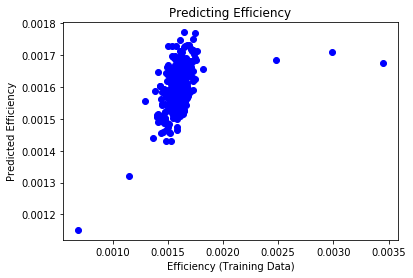

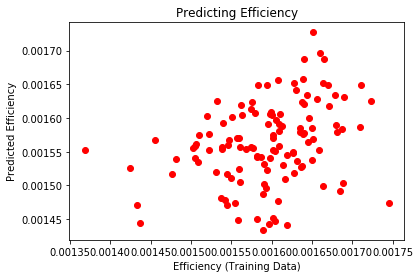

In [51]:
plt.plot(y_train, y_pred_train, 'ob');
plt.xlabel('Efficiency (Training Data)');
plt.ylabel('Predicted Efficiency');
plt.title('Predicting Efficiency');
plt.show()

plt.plot(y_test, y_pred_test, 'or');
plt.xlabel('Efficiency (Training Data)');
plt.ylabel('Predicted Efficiency');
plt.title('Predicting Efficiency');

# Model 2: All inputs and output is Total Heat Time

In [52]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,,'Voltage','Frequency'
output_columns = ['Total Heat Time (minutes)']

In [53]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [55]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
pred_train = lr.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = lr.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 453.6921543486314
Test score is 417.70356400286937
R2 score is 0.2427866942794341
Train NMSE score is 90.1119406215755
Test NMSE score is 75.72133057205659
Weight of Scrap (MT) is 0.16813952012114228
Weight of Sponge (MT) is 0.23701041545797913
Weight of Hot Heel (MT) is -3.469446951953614e-16
Weight of Alloys (MT) is 0.060929468100820096
Weight of Previous Voltage is 0.016669674363785022
Weight of Previous Frequency is 0.01545907054657623
Weight of Previous Rating of the Furnace is 0.01666967436378503
Weight of Refractory lining before heating is -0.07923030084343306
Weight of Number of capacitors removed is -0.04762057502623319
Weight of Tapping Temperature (C) is 0.07828834000785691


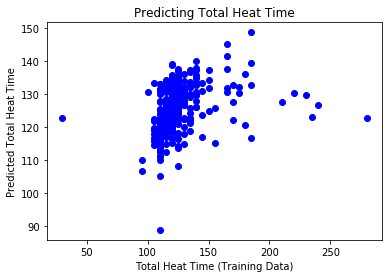

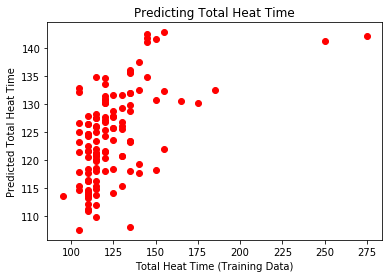

In [57]:
plt.plot(y_train, y_pred_train, 'ob');
plt.xlabel('Total Heat Time (Training Data)');
plt.ylabel('Predicted Total Heat Time');
plt.title('Predicting Total Heat Time');
plt.show()

plt.plot(y_test, y_pred_test, 'or');
plt.xlabel('Total Heat Time (Training Data)');
plt.ylabel('Predicted Total Heat Time');
plt.title('Predicting Total Heat Time');

# Model 3: All inputs and output is Voltage

In [58]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,,,'Frequency'
output_columns = ['Voltage']

In [59]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [61]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
pred_train = lr.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = lr.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 5614.912564840323
Test score is 5177.624087504596
R2 score is 0.8475987078621732
Train NMSE score is 20.502708040232847
Test NMSE score is 15.240129213782684
Weight of Scrap (MT) is -0.17019229228780966
Weight of Sponge (MT) is -0.1529182783483261
Weight of Hot Heel (MT) is 2.7755575615628914e-16
Weight of Alloys (MT) is -0.06733303279474588
Weight of Previous Voltage is 0.32551442240060596
Weight of Previous Frequency is -0.1885050812574398
Weight of Previous Rating of the Furnace is 0.32551442240060596
Weight of Refractory lining before heating is 0.23961866663148948
Weight of Number of capacitors removed is 0.21598568684057892
Weight of Tapping Temperature (C) is -0.0599580264575253


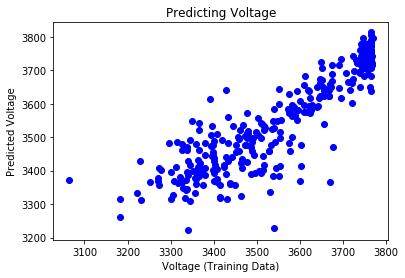

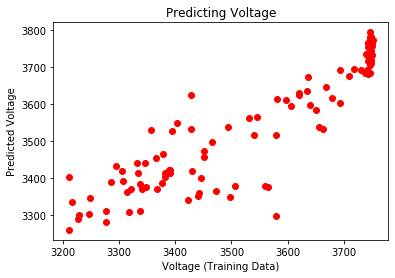

In [62]:
plt.plot(y_train, y_pred_train, 'ob');
plt.xlabel('Voltage (Training Data)');
plt.ylabel('Predicted Voltage');
plt.title('Predicting Voltage');
plt.show()

plt.plot(y_test, y_pred_test, 'or');
plt.xlabel('Voltage (Training Data)');
plt.ylabel('Predicted Voltage');
plt.title('Predicting Voltage');

# Model 4: All inputs and output is Frequency

In [64]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,,,
output_columns = ['Frequency']

In [65]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [66]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [67]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
pred_train = lr.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = lr.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 25.42120487442552
Test score is 33.11462227542248
R2 score is 0.958591671157399
Train NMSE score is 3.11719337527774
Test NMSE score is 4.140832884260102
Weight of Scrap (MT) is 0.25273177336968605
Weight of Sponge (MT) is 0.27875373885941457
Weight of Hot Heel (MT) is -5.551115123125783e-16
Weight of Alloys (MT) is 0.03316257990333295
Weight of Previous Voltage is -0.014497731096450509
Weight of Previous Frequency is 0.36353117885499925
Weight of Previous Rating of the Furnace is -0.014497731096450426
Weight of Refractory lining before heating is -0.0789762515179712
Weight of Number of capacitors removed is 0.4047183889603935
Weight of Tapping Temperature (C) is -0.027316355527446132


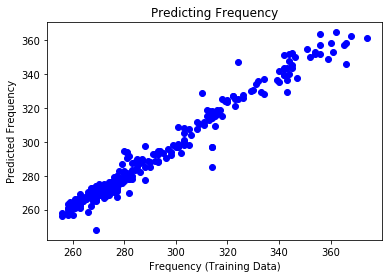

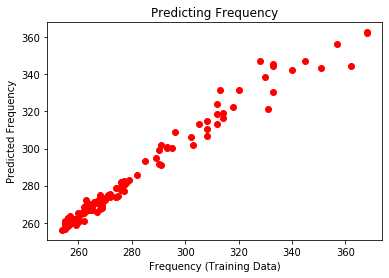

In [68]:
plt.plot(y_train, y_pred_train, 'ob');
plt.xlabel('Frequency (Training Data)');
plt.ylabel('Predicted Frequency');
plt.title('Predicting Frequency');
plt.show()

plt.plot(y_test, y_pred_test, 'or');
plt.xlabel('Frequency (Training Data)');
plt.ylabel('Predicted Frequency');
plt.title('Predicting Frequency');

# Model 5: All inputs and output is Refractory lining after heating

In [69]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Refractory lining after heating']

In [70]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [72]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
pred_train = lr.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = lr.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 5.448473965188409e-05
Test score is 0.00015644925822160427
R2 score is 0.9997583429178197
Train NMSE score is 0.00850985530124092
Test NMSE score is 0.024165708218023083
Weight of Scrap (MT) is -0.0037970284259258207
Weight of Sponge (MT) is -0.006919803242719156
Weight of Hot Heel (MT) is 3.3306690738754696e-16
Weight of Alloys (MT) is -2.191317441565982e-05
Weight of Previous Voltage is 0.002868355755659284
Weight of Previous Frequency is -0.014753205613869785
Weight of Previous Rating of the Furnace is 0.0028683557556594226
Weight of Refractory lining before heating is 0.9899502384415904
Weight of Number of capacitors removed is 0.0052628138554306385
Weight of Tapping Temperature (C) is -0.0011011594126453994


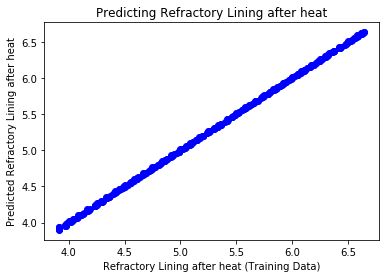

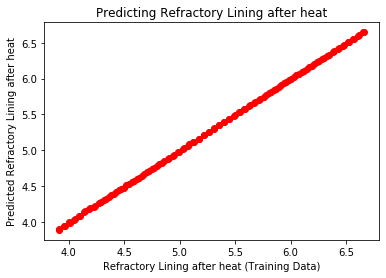

In [73]:
plt.plot(y_train, y_pred_train, 'ob');
plt.xlabel('Refractory Lining after heat (Training Data)');
plt.ylabel('Predicted Refractory Lining after heat');
plt.title('Predicting Refractory Lining after heat');
plt.show()

plt.plot(y_test, y_pred_test, 'or');
plt.xlabel('Refractory Lining after heat (Training Data)');
plt.ylabel('Predicted Refractory Lining after heat');
plt.title('Predicting Refractory Lining after heat');

# Model 6: All inputs and All outputs 

In [25]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

In [26]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [28]:
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
pred_train = lr.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = lr.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(lr.coef_.shape[0]):
    for j in range(lr.coef_.shape[1]):
        print("Weight of {} on {} is {}".format(input_columns[j], output_columns[i],lr.coef_[i][j]))
    print('\n')

Train score is 1218.805195714231
Test score is 1125.6884860476878
R2 score is 0.5032049704752839
Train NMSE score is 0.06331308965943833
Test NMSE score is 0.05809668594795428
Weight of Scrap (MT) on Efficiency (MT/KWH) is 0.2037608262306261
Weight of Sponge (MT) on Efficiency (MT/KWH) is 0.29077188474849147
Weight of Hot Heel (MT) on Efficiency (MT/KWH) is -3.608224830031759e-16
Weight of Alloys (MT) on Efficiency (MT/KWH) is -0.05378331718148873
Weight of Previous Voltage on Efficiency (MT/KWH) is -0.004877002969210002
Weight of Previous Frequency on Efficiency (MT/KWH) is -0.00019996049904216407
Weight of Previous Rating of the Furnace on Efficiency (MT/KWH) is -0.004877002969209961
Weight of Refractory lining before heating on Efficiency (MT/KWH) is 0.02698447686758437
Weight of Number of capacitors removed on Efficiency (MT/KWH) is 0.010553024884314402
Weight of Tapping Temperature (C) on Efficiency (MT/KWH) is 0.02409535009183354


Weight of Scrap (MT) on Total Heat Time (minutes

# Without Normalization 

# Model 1: All inputs and output is Efficiency 

In [45]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,'Total Heat Time (minutes)','Voltage','Frequency'
output_columns = ['Efficiency (MT/KWH)']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 2.3032118905713635e-08
Test score is 6.287569854836143e-09
R2 score is -0.5327105638404066
Train NMSE score is 81.01574894466779
Test NMSE score is 153.27105638404066
Weight of Scrap (MT) is 2.441331990149894e-05
Weight of Sponge (MT) is 2.3498060495789264e-05
Weight of Hot Heel (MT) is -1.060485249962384e-18
Weight of Alloys (MT) is -0.00026466318989312775
Weight of Previous Voltage is -1.9009364192128667e-08
Weight of Previous Frequency is -4.919944166933336e-09
Weight of Previous Rating of the Furnace is -1.900936419058368e-08
Weight of Refractory lining before heating is 2.727445377081223e-05
Weight of Number of capacitors removed is 3.6351384828785694e-06
Weight of Tapping Temperature (C) is 4.6596399640380275e-08


# Model 2: All inputs and output is Total Heat time

In [46]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,,'Voltage','Frequency'
output_columns = ['Total Heat Time (minutes)']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 453.6921543486314
Test score is 417.7035640028689
R2 score is 0.24278669427943478
Train NMSE score is 90.1119406215755
Test NMSE score is 75.72133057205652
Weight of Scrap (MT) is 1.8276034795776268
Weight of Sponge (MT) is 1.7376130167069745
Weight of Hot Heel (MT) is 1.1080025785759062e-13
Weight of Alloys (MT) is 27.200655402151725
Weight of Previous Voltage is 0.005894510029707729
Weight of Previous Frequency is 0.03450685389860874
Weight of Previous Rating of the Furnace is 0.00589451002954608
Weight of Refractory lining before heating is -7.26506304277893
Weight of Number of capacitors removed is -1.4881429695697905
Weight of Tapping Temperature (C) is 0.013734796492607955


# Model 3: All inputs and output is Voltage

In [47]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,,,'Frequency'
output_columns = ['Voltage']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 5614.91256484032
Test score is 5177.624087504598
R2 score is 0.8475987078621732
Train NMSE score is 20.502708040232836
Test NMSE score is 15.240129213782689
Weight of Scrap (MT) is -5.2315630716296235
Weight of Sponge (MT) is -3.1704757419876493
Weight of Hot Heel (MT) is -3.5216274341109965e-13
Weight of Alloys (MT) is -85.00795390336609
Weight of Previous Voltage is 0.3255144224003618
Weight of Previous Frequency is -1.189938325437594
Weight of Previous Rating of the Furnace is 0.32551442240084855
Weight of Refractory lining before heating is 62.13669282818199
Weight of Number of capacitors removed is 19.087735074536113
Weight of Tapping Temperature (C) is -0.029747596284546225


# Model 4: All inputs and output is Frequency

In [49]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
#,,,
output_columns = ['Frequency']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(len(lr.coef_[0])):
    print("Weight of {} is {}".format(input_columns[i], lr.coef_[0][i]))

Train score is 25.421204874425513
Test score is 33.114622275422235
R2 score is 0.9585916711573993
Train NMSE score is 3.117193375277739
Test NMSE score is 4.140832884260073
Weight of Scrap (MT) is 1.2966238807662125
Weight of Sponge (MT) is 0.9646023808887043
Weight of Hot Heel (MT) is 3.0531133177191805e-14
Weight of Alloys (MT) is 6.987829336773705
Weight of Previous Voltage is -0.002419706180153068
Weight of Previous Frequency is 0.38300606343651816
Weight of Previous Rating of the Furnace is -0.0024197061801890392
Weight of Refractory lining before heating is -3.418114429767037
Weight of Number of capacitors removed is 5.969596237165795
Weight of Tapping Temperature (C) is -0.002261985931402227


#  Model 5: All inputs and All outputs 

In [50]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating',
                'Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print("Train score is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Test score is {}".format(mean_squared_error(y_test, y_pred_test)))
print("R2 score is {}".format(r2_score(y_test, y_pred_test)))
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

for i in range(lr.coef_.shape[0]):
    for j in range(lr.coef_.shape[1]):
        print("Weight of {} on {} is {}".format(input_columns[j], output_columns[i],lr.coef_[i][j]))
    print('\n')

Train score is 1523.5064810216047
Test score is 1407.1105684472955
R2 score is 0.3790666273646499
Train NMSE score is 0.06890412028798498
Test NMSE score is 0.06318708721561522
Weight of Scrap (MT) on Efficiency (MT/KWH) is 2.441331990149894e-05
Weight of Sponge (MT) on Efficiency (MT/KWH) is 2.3498060495789267e-05
Weight of Hot Heel (MT) on Efficiency (MT/KWH) is -1.043544591017298e-18
Weight of Alloys (MT) on Efficiency (MT/KWH) is -0.00026466318989312775
Weight of Previous Voltage on Efficiency (MT/KWH) is -1.9009364192128227e-08
Weight of Previous Frequency on Efficiency (MT/KWH) is -4.919944166933612e-09
Weight of Previous Rating of the Furnace on Efficiency (MT/KWH) is -1.900936419058324e-08
Weight of Refractory lining before heating on Efficiency (MT/KWH) is 2.72744537708122e-05
Weight of Number of capacitors removed on Efficiency (MT/KWH) is 3.635138482878575e-06
Weight of Tapping Temperature (C) on Efficiency (MT/KWH) is 4.659639964038702e-08


Weight of Scrap (MT) on Total He